# Lecture 18 Foundations of Supervised Learning

# Why Does Supervised Learning Work?

Prevously, we learned about supervised learning, derived our first algorithm, and used it to predict diabetes risk.

In this lecture, we are going to dive deeper into why supevised learning really works.

# Part 1: Data Distribution

First, let's look at the data, and define where it comes from.

Later, this will be useful to precisely define when supervised learning is guaranteed to work.

# Review: Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \underbrace{\text{Training Dataset}}_\text{Attributes + Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

Where does the dataset come from?

# Data Distribution

We will assume that the dataset is sampled from a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$x, y \sim \mathbb{P}.$$

The training set $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$.

# Data Distribution: IID Sampling

The key assumption in that the training examples are *independent and identicaly distributed* (IID). 
* Each training example is from the same distribution.
* This distribution doesn't depend on previous training examples.

__Example__: Flipping a coin. Each flip has same probability of heads & tails and doesn't depend on previous flips.

__Counter-Example__: Yearly census data. The population in each year will be close to that of the previous year.

# Data Distribution: Example

Let's implement an example of a data distribution in numpy.

In [1]:
import numpy as np
np.random.seed(0)

def true_fn(X):
    return np.cos(1.5 * np.pi * X)

Let's visualize it.

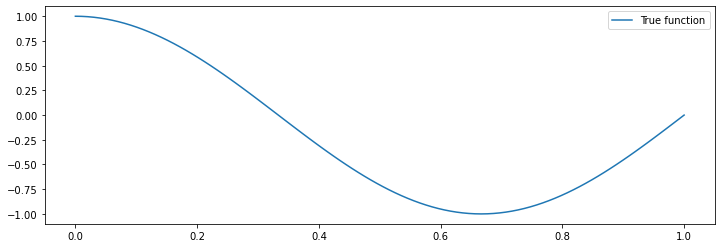

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fn(X_test), label="True function")
plt.legend()

Let's now draw samples from the distribution. We will generate random $x$, and then generate random $y$ using
$$ y = f(x) + \epsilon $$
for a random noise variable $\epsilon$.

In [3]:
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fn(X) + np.random.randn(n_samples) * 0.1

We can visualize the samples.

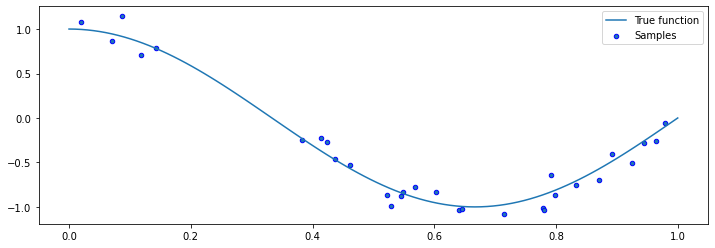

In [4]:
plt.plot(X_test, true_fn(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.legend()

# Data Distribution: Motivation

Why assume that the dataset is sampled from a distribution?

* There is inherent uncertainty in the data. The data may consist of noisy measurements (readings from an imperfect thermometer).

* There is uncertainty in the process we model. If $y$ is a stock price, there is randomness in the market that cannot be modeled.

* We can use probability and statistics to analyze supervised learning algorithms and prove that they work.

# Part 2: Why Does Supervised Learning Work?

We made the assumption that the training dataset is sampled from a data distribution.

Let's now use it to gain intuition about why supervised learning works.

# Review: Data Distribution

We will assume that the dataset is sampled from a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$x, y \sim \mathbb{P}.$$

The training set $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$.

# Review: Supervised Learning Model

We'll say that a model is a function
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

# What Makes A Good Model?

There are several things we may want out of a good model:
1. Interpretable features that explain how $x$ affects $y$.
2. Confidence intervals around $y$ (we will see later how to obtain these)
3. Accurate predictions of the targets $y$ from inputs $x$.

In this lecture, we fill focus on the latter.

# What Makes A Good Model?

A good predictive model is one that makes __accurate predictions__ on __new data__ that it has not seen at training time.

# Hold-Out Dataset: Definition

A hold-out dataset 
$$\dot{\mathcal{D}} = \{(\dot{x}^{(i)}, \dot{y}^{(i)}) \mid i = 1,2,...,m\}$$
is another dataset that is sampled IID from the same distribution $\mathbb{P}$ as the training dataset $\mathcal{D}$ and the two datasets are disjoint.

Let's generate a hold-out dataset for the example we saw earlier.

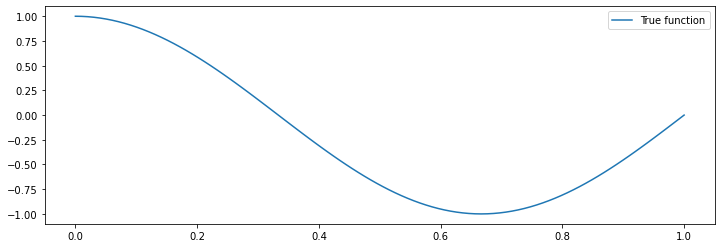

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

def true_fn(X):
    return np.cos(1.5 * np.pi * X)

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fn(X_test), label="True function")
plt.legend()

Let's generate a hold-out dataset for the example we saw earlier.

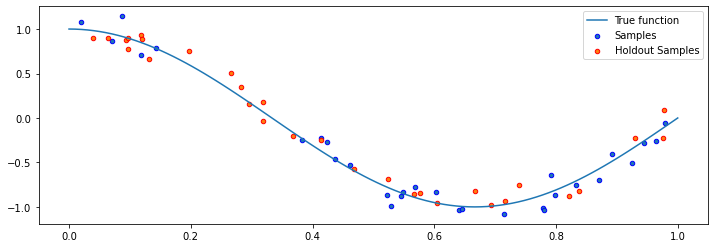

In [6]:
n_samples, n_holdout_samples = 30, 30

X = np.sort(np.random.rand(n_samples))
y = true_fn(X) + np.random.randn(n_samples) * 0.1
X_holdout = np.sort(np.random.rand(n_holdout_samples))
y_holdout = true_fn(X_holdout) + np.random.randn(n_holdout_samples) * 0.1

plt.plot(X_test, true_fn(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.scatter(X_holdout, y_holdout, edgecolor='r', s=20, label="Holdout Samples")
plt.legend()

# Defining What is an Accurate Prediction

Suppose that we have a function $\texttt{isaccurate}(y, y')$ that determines if $y$ is an accurate estimate of $y'$, e.g.:
* Is the the target variable close enough to the true target?
$$\texttt{isaccurate}(y, y') = \text{true if } (|y - y'| \text{ is small), else false}$$

* Did we predict the right class?
$$\texttt{isaccurate}(y, y') = \text{true if } (y = y') \text{ else false} $$

This defines accuracy on a data point. We say a supervised learning model is accurate if it correctly predicts the target on *new (held-out) data*.

# Defining What is an Accurate Model

We can say that a predictive model $f$ is accurate if it's probability of making an error on a random holdout sample is small:

$$ 1 - \mathbb{P} \left[ \texttt{isaccurate}(\dot y, f(\dot x)) \right] \leq \epsilon $$

for $\dot{x}, \dot{y} \sim \mathbb{P}$, for some small $\epsilon > 0$ and some definition of accuracy.

We can also say that a predictive model $f$ is inaccurate if it's probability of making an error on a random holdout sample is large:

$$ 1 - \mathbb{P} \left[ \texttt{isaccurate}(\dot y, f(\dot x)) \right] \geq \epsilon $$

or equivalently

$$\mathbb{P} \left[ \texttt{isaccurate}(\dot y, f(\dot x)) \right] \leq  1-\epsilon.$$

# Generalization

In machine learning, __generalization__ is the property of predictive models to achieve good performance on new, held-out data that is distinct from the training set.

Will supervised learning return a model that generalizes?

# Part 3: Overfitting and Underfitting

Let's now dive deeper into the concept of generalization and two possible failure modes of supervised learning: overfitting and underfitting.

# Review: Generalization

We will assume that the dataset is governed by a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$x, y \sim \mathbb{P}.$$

A hold-out set $\dot{\mathcal{D}} = \{(\dot{x^{(i)}}, \dot{y^{(i)}}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$ and is distinct from the training set.

A model that __generalizes__ is accurate on a hold-out set.

# Review: Polynomial Regression

In 1D polynomial regression, we fit a model
$$ f_\theta(x) := \theta^\top \phi(x) $$
that is linear in $\theta$, but non-linear in $x$ because the features $\phi(x) : \mathbb{R} \to \mathbb{R}^p$ are non-linear.

By using polynomial features such as $\phi(x) = [1\; x\; \ldots\; x^p]$, we can fit any polynomial of degree $p$.

# Polynomials Better Fit the Data

When we switch from linear models to polynomials, we can better fit the data and increase the accuracy of our models.

Consider the synthetic dataset that we have seen earlier.

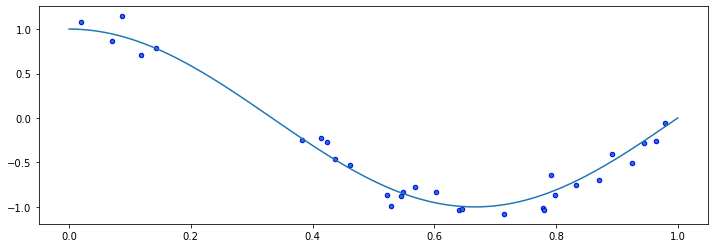

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fn(X) + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fn(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

Although fitting a linear model does not work well, qudratic or cubic polynomials improve the fit.

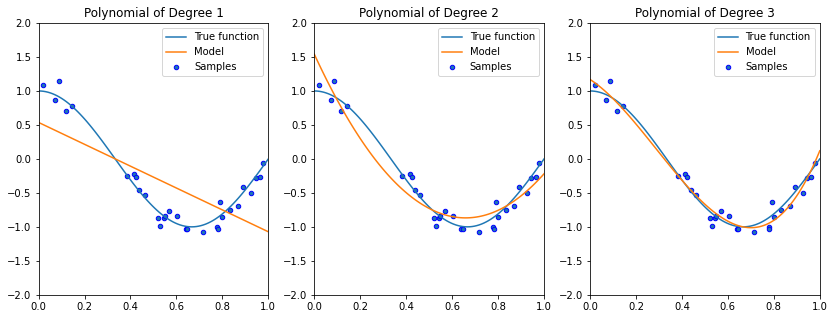

In [8]:
degrees = [1, 2, 3]
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    ax.plot(X_test, true_fn(X_test), label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Polynomial of Degree {}".format(degrees[i]))

# Towards Higher-Degree Polynomial Features?

As we increase the complexity of our model class $\mathcal{M}$ to even higher degree polynomials, we are able to fit the data increasingly even better.

What happens if we further increase the degree of the polynomial?

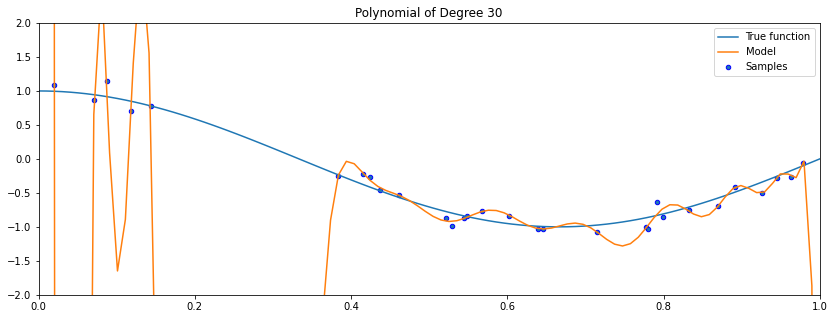

In [9]:
degrees = [30]
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    ax.plot(X_test, true_fn(X_test), label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Polynomial of Degree {}".format(degrees[i]))

# The Problem With Increasing Model Capacity

As the degree of the polynomial increases to the size of the dataset, we are increasingly able to fit every point in the dataset.

However, this results in a highly irregular curve: its behavior outside the training set is wildly inaccurate.

# Overfitting

Overfitting is one of the most common failure modes of machine learning.
* A very expressive model (a high degree polynomial) fits the training dataset perfectly.
* The model also makes wildly incorrect prediction outside this dataset, and doesn't generalize.

# Underfitting

A related failure mode is underfitting.

* A small model (e.g. a straight line), will not fit the training data well.
* Held-out data is similar to training data, so it will not be accurate either.

<!-- __Underfitting__: On one hand, if the model is too small (like the linear model in the above example), it will not generalize well to unseen data because it is not sufficiently complex to fit the true structure of the dataset.

__Overfitting__: On the other hand, if the model is too expressive (like a high degree polynomial), we are going to fit the training dataset perfectly; however, the model will make wildly incorrect prediction at points right outside this dataset, and will also not generalize well to unseen data. -->

Finding the tradeoff between overfitting and underfitting is one of the main challenges in applying machine learning.

# Overfitting vs. Underfitting: Evaluation

We can measure overfitting and underfitting by estimating accuracy on held-out data and comparing it to the training data.
* If training performance is high but held-out performance is low, we are overfitting.
* If training performance is low but held-out performance is low, we are underfitting.

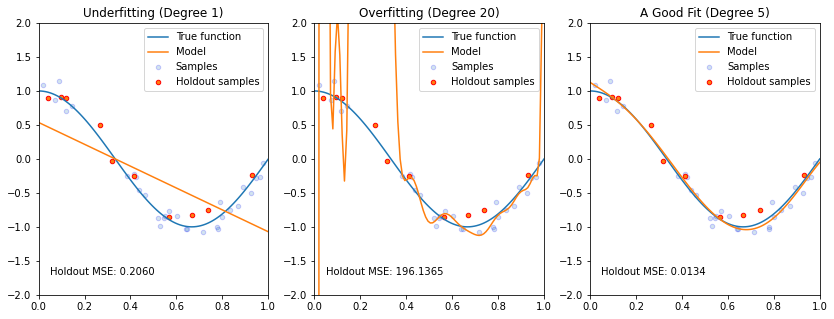

In [10]:
degrees = [1, 20, 5]
titles = ['Underfitting', 'Overfitting', 'A Good Fit']
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    ax.plot(X_test, true_fn(X_test), label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples", alpha=0.2)
    ax.scatter(X_holdout[::3], y_holdout[::3], edgecolor='r', s=20, label="Holdout samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("{} (Degree {})".format(titles[i], degrees[i]))
    ax.text(0.05,-1.7, 'Holdout MSE: %.4f' % ((y_holdout-pipeline.predict(X_holdout[:, np.newaxis]))**2).mean())

# Dealing with Underfitting

Balancing overfitting vs. underfitting is a major challenges in applying machine learning. Briefly, here are some approaches:
* To fight under-fitting, we may increase our model class to encompass more expressive models.
* We may also create richer features for the data that will make the dataset easier to fit.

# Dealing with Overfitting

We will see many ways of dealing with overftting, but here are some ideas:
* If we're overfitting, we may reduce the complexity of our model by reducing the size of $\mathcal{M}$
* We may also modify our objective to penalize complex models that may overfit the data.

# Part 4: Regularization

We will now see a very important way to reduce overfitting --- regularization. We will also see several important new algorithms.

# Review: Generalization

We will assume that the dataset is governed by a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$x, y \sim \mathbb{P}.$$

A hold-out set $\dot{\mathcal{D}} = \{(\dot{x^{(i)}}, \dot{y^{(i)}}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$ and is distinct from the training set.

# Review: Overfitting

Overfitting is one of the most common failure modes of machine learning.
* A very expressive model (a high degree polynomial) fits the training dataset perfectly.
* The model also makes wildly incorrect prediction outside this dataset, and doesn't generalize.

We can visualize overfitting by trying to fit a small dataset with a high degree polynomial.

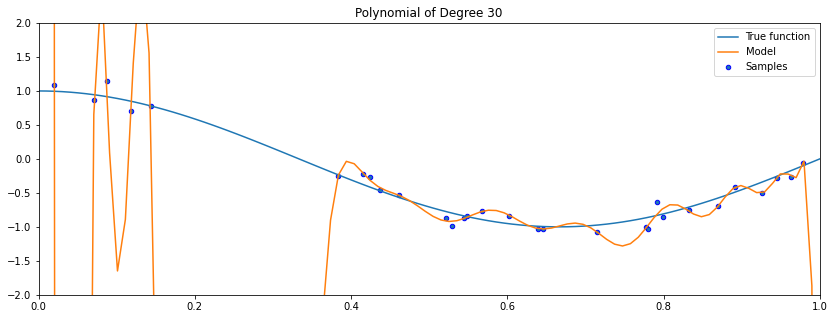

In [11]:
degrees = [30]
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    ax.plot(X_test, true_fn(X_test), label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Polynomial of Degree {}".format(degrees[i]))

# Regularization: Intuition

The idea of regularization is to penalize complex models that may overfit the data.

In the previous example, a less complex would rely less on polynomial terms of high degree.

# Regularization: Definition

The idea of regularization is to train models with an augmented objective $J : \mathcal{M} \to \mathbb{R}$ defined over a training dataset $\mathcal{D}$ of size $n$ as
$$J(f) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f(x^{(i)})) + \lambda \cdot R(f).$$

Let's dissect the components of this objective:

$$J(f) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f(x^{(i)})) + \lambda \cdot R(f).$$

* A loss function $L(y, f(x))$ such as the mean squared error.

* A regularizer $R : \mathcal{M} \to \mathbb{R}$ that penalizes models that are overly complex.

* A regularization parameter $\lambda > 0$, which controls the strength of the regularizer.

When the model $f_\theta$ is parametrized by parameters $\theta$, we can also use the following notation:

$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f_\theta(x^{(i)})) + \lambda \cdot R(\theta).$$

# L2 Regularization: Definition

How can we define a regularizer $R: \mathcal{M} \to \mathbb{R}$ to control the complexity of a model $f \in \mathcal{M}$?

In the context of linear models $f(x) = \theta^\top x$, a widely used approach is L2 regularization, which defines the following objective:
$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \frac{\lambda}{2} \cdot ||\theta||_2^2.$$

Let's dissect the components of this objective.
$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \frac{\lambda}{2} \cdot ||\theta||_2^2.$$

* The regularizer $R : \mathcal{M} \to \mathbb{R}$ is the function 
$R(\theta) = ||\theta||_2^2 = \sum_{j=1}^d \theta_j^2.$ 
This is also known as the L2 norm of $\theta$.

* In L2 regularization, the sum of the squares of the weights are added to the loss function

* The regularizer penalizes large parameters. This prevents us from over-relying on any single feature and penalizes wildly irregular solutions.

* L2 regularization can be used with most models (linear, neural, etc.)

# L2 Regularization for Polynomial Regression

Let's consider an application to the polynomial model we have seen so far. Given polynomial features $\phi(x)$, we optimize the following objective:
$$ J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( y^{(i)} - \theta^\top \phi(x^{(i)}) \right)^2 + \frac{\lambda}{2} \cdot ||\theta||_2^2. $$


We are going to implement regularized and standard polynomial regression on three random training sets sampled from the same distribution.

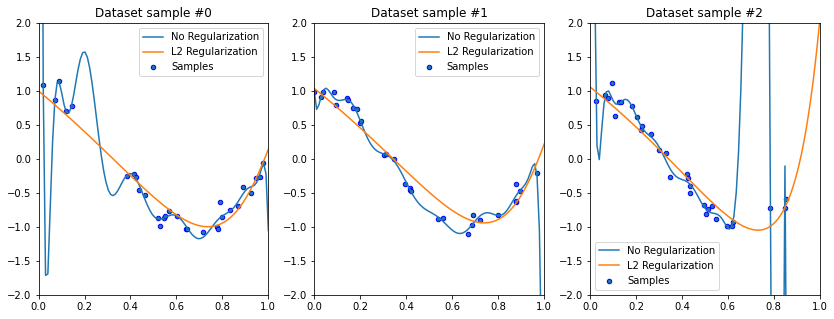

In [12]:
from sklearn.linear_model import Ridge

degrees = [15, 15, 15]
plt.figure(figsize=(14, 5))
for idx, i in enumerate(range(len(degrees))):
    # sample a dataset
    np.random.seed(idx)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = true_fn(X) + np.random.randn(n_samples) * 0.1

    # fit a least squares model
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    # fit a Ridge model
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = Ridge(alpha=0.1) # sklearn uses alpha instead of lambda
    pipeline2 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline2.fit(X[:, np.newaxis], y)    

    # visualize results
    ax = plt.subplot(1, len(degrees), i + 1)
    # ax.plot(X_test, true_fn(X_test), label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="No Regularization")
    ax.plot(X_test, pipeline2.predict(X_test[:, np.newaxis]), label="L2 Regularization")    
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Dataset sample #{}".format(idx))

We can show that by using small weights, we prevent the model from learning irregular functions.

In [13]:
print('Non-regularized weights of the polynomial model need to be large to fit every point:')
print(pipeline.named_steps['lr'].coef_[:4])
print()

print('By regularizing the weights to be small, we force the curve to be more regular:')
print(pipeline2.named_steps['lr'].coef_[:4])

Non-regularized weights of the polynomial model need to be large to fit every point:
[-3.02369384e+03  1.16528366e+05 -2.44723313e+06  3.20287876e+07]

By regularizing the weights to be small, we force the curve to be more regular:
[-2.70114811 -1.20575056 -0.09210716  0.44301292]


# How to Choose $\lambda$?

In brief, the most common approach is to choose the value of $\lambda$ that results in the best performance on a held-out *validation* set.

We will later see this strategies and several other in more detail

# Normal Equations for Regularized Models

How, do we fit regularized models? In the linear case, we can do this easily by deriving generalized normal equations! 

Let $L(\theta) = \frac{1}{2} (X \theta - y)^\top  (X \theta - y)$ be our least squares objective. We can write the Ridge objective as:

$$ J(\theta) = \frac{1}{2} (X \theta - y)^\top  (X \theta - y) + \frac{1}{2} \lambda ||\theta||_2^2 $$

This allows us to derive the gradient as follows:
\begin{align*}
\nabla_\theta J(\theta) 
& = \nabla_\theta \left( \frac{1}{2} (X \theta - y)^\top  (X \theta - y) + \frac{1}{2} \lambda ||\theta||_2^2 \right) \\
& = \nabla_\theta \left( L(\theta) + \frac{1}{2} \lambda ||\theta||_2^2 \right) \\
& = \nabla_\theta L(\theta) + \lambda \theta \\
& = (X^\top X) \theta - X^\top y + \lambda \theta \\
& = (X^\top X + \lambda I) \theta - X^\top y
\end{align*}

We used the derivation of the normal equations for least squares to obtain $\nabla_\theta L(\theta)$ as well as the fact that: $\nabla_x x^\top x = 2 x$.

We can set the gradient to zero to obtain normal equations for the Ridge model:

$$ (X^\top X + \lambda I) \theta = X^\top y. $$

Hence, the value $\theta^*$ that minimizes this objective is given by:

$$ \theta^* = (X^\top X + \lambda I)^{-1} X^\top y.$$

Note that the matrix $(X^\top X + \lambda I)$ is always invertible, which addresses a problem with least squares that we saw earlier.

# Algorithm: Ridge Regression

* __Type__: Supervised learning (regression)
* __Model family__: Linear models
* __Objective function__: L2-regularized mean squared error
* __Optimizer__: Normal equations

# Part 5: Regularization and Sparsity

We will now look another form of regularization, which will have an important new property called sparsity.

# Regularization: Definition

The idea of regularization is to train models with an augmented objective $J : \mathcal{M} \to \mathbb{R}$ defined over a training dataset $\mathcal{D}$ of size $n$ as
$$ J(f) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f(x^{(i)})) + \lambda \cdot R(f). $$

Let's dissect the components of this objective:

$$ J(f) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f(x^{(i)})) + \lambda \cdot R(f). $$

* A loss function $L(y, f(x))$ such as the mean squared error.

* A regularizer $R : \mathcal{M} \to \mathbb{R}$ that penalizes models that are overly complex.

# L1 Regularizion: Definition

Another closely related approach to regularization is to penalize the size of the weights using the L1 norm.

In the context of linear models $f(x) = \theta^\top x$, L1 regularization yields the following objective:

$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \lambda \cdot ||\theta||_1. $$

Let's dissect the components of this objective.
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \lambda \cdot ||\theta||_1. $$

* The regularizer $R : \mathcal{M} \to \mathbb{R}$ is the function 
$R(\theta) = ||\theta||_1 = \sum_{j=1}^d |\theta_j|.$ 
This is also known as the L1 norm of $\theta$.

* In L1 regularization, the sum of the absolute values of the weights of the model are added to the loss function.

* The regularizer also penalizes large weights. It also forces more weights to decay to zero, as opposed to just being small.

# Algorithm: Lasso

L1-regularized linear regression is also known as the Lasso (least absolute shrinkage and selection operator).

* __Type__: Supervised learning (regression)
* __Model family__: Linear models
* __Objective function__: L1-regularized mean squared error

* __Optimizer__: gradient descent, coordinate descent, least angle regression (LARS) and others

# Regularizing via Constraints

Consider regularized problem with a penalty term:
$$ \min_{\theta \in \Theta} L(\theta) + \lambda \cdot R(\theta). $$

We may also enforce an explicit constraint on the complexity of the model:

\begin{align*}
\min_{\theta \in \Theta} \; & L(\theta) \\
\text{such that } \; & R(\theta) \leq \lambda'
\end{align*}

We will not prove this, but solving this problem is equivalent so solving the penalized problem for some $\lambda > 0$ that's different from $\lambda'$.

In other words, 
* We can regularize by explicitly enforcing $R(\theta)$ to be less than a value instead of penalizing it.
* For each value of $\lambda$, we are implicitly setting a constraint of $R(\theta)$.

# Regularizing via Constraints: Example

This is what it looks like for a linear model:
\begin{align*}
\min_{\theta \in \Theta} \; & \frac{1}{2n} \sum_{i=1}^n \left( y^{(i)} - \theta^\top x^{(i)} \right)^2 \\
\text{such that } \; & ||\theta|| \leq \lambda'
\end{align*}
where $||\cdot||$ can either be the L1 or L2 norm.

# L1 vs. L2 Regularization

The following image by <a href="https://medium.com/uwaterloo-voice/a-deep-dive-into-regularization-eec8ab648bce">Divakar Kapil</a> and Hastie et al. explains the difference between the two norms.

<left><img width=75% src="img/l1-vs-l2-annotated.png"></left>

# L1 Regularizion
* L1 norm defines a diamond shaped boundary around the origin which restricts the loss function values from obtaining a value of 0 that is prevent the model from overfitting. 
* The idea is that during optimization of the loss fucntion (shown by the elliptical contour), the value of the loss function will not decrease further than the value obtained when the ellipitical contour touches/intersects the boundary defined by the norm. 
* In case of L1 regularization, the loss function has a greater chance of hitting the edges of the diamond rather than the sides due to the extreme shape of the boundary. 
* Hence, L1 regularization results in some weights turning to 0. 
* For example, in the image above the loss function contour touches the diamond at $\beta_2$ axis. 
* This means that the value of the weight value $\beta_1$ is 0.

# L2 Regularizion
* The L2 norm defines the euclidean distance between two points or the magnitude of the vector defined by its components. 
* Hence, the boundary that restricts the values of the ellipitical contour is a smoother curve, i.e. a circle. 
* Similar to L1, the value of the loss function will not decrease further than the values obtained on the intersection of the elliptical contour with the circle. 
* Since L2 norm defines a circle as a boundary rather than weight values becoming 0, all the weight values shrink in proportion. 
* Thus, though the model reduces the weight values, most of them still remain non-zero. 
* This leads to a heavy and complex model with no in built feature selection.

<left><img src="img/ridgelassoItayEvron.gif"></left>

# Sparsity: Definition

A vector is said to be sparse if a large fraction of its entires is zero.

L1-regularized linear regression produces *sparse weights*.
* This is makes the model more interpretable
* It also makes it computationally more tractable in very large dimensions.

# Sparsity: Ridge Model

To better understand sparsity, we will fit L2-regularized linear models to the UCI diabetes dataset and observe the magnitude of each weight (colored lines) as a function of the regularization parameter.

(4.466835921509635e-06,
 223.872113856834,
 -868.4051623854938,
 828.0533448059289)

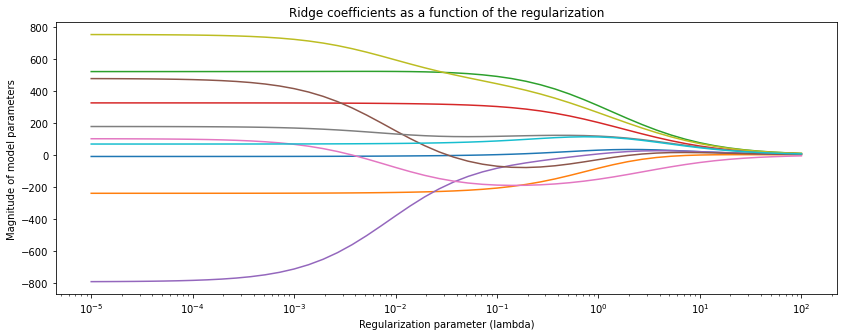

In [14]:
# based on https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt

X, y = load_diabetes(return_X_y=True)

# create ridge coefficients
alphas = np.logspace(-5, 2,  )
ridge_coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

# plot ridge coefficients
plt.figure(figsize=(14, 5))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Regularization parameter (lambda)')
plt.ylabel('Magnitude of model parameters')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

# Sparsity: Lasso Model

The above Ridge model did not produce sparse weights. Let's now compare it to a Lasso model.

(3673.0002477572816, -133.0052029029091, -869.3573357636969, 828.4524952229674)

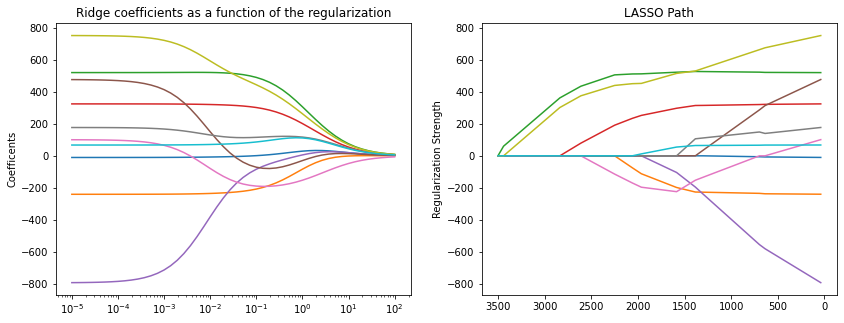

In [15]:
# Based on: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_diabetes
from sklearn.linear_model import lars_path

# create lasso coefficients    
_, _, lasso_coefs = lars_path(X, y, method='lasso')
xx = np.sum(np.abs(lasso_coefs.T), axis=1)

# plot ridge coefficients
plt.figure(figsize=(14, 5))
plt.subplot('121')    
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.ylabel('Regularization Strength (alpha)')
plt.ylabel('Coefficents')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

# plot lasso coefficients
plt.subplot('122') 
plt.plot(3500-xx, lasso_coefs.T)
ymin, ymax = plt.ylim()
plt.xlim(ax.get_xlim()[::-1])  # reverse axis
plt.ylabel('Coefficients')
plt.ylabel('Regularization Strength')
plt.title('LASSO Path')
plt.axis('tight')